<a href="https://colab.research.google.com/github/KrishSharmila/Assignment-8---To-Find-Car-Worth/blob/main/Assignment_8_To_Find_Car_Worth_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How Much is Your Car Worth?**

Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

**The columns are:**

**Price**: suggested retail price of the used 2005 GM car in excellent condition.
Mileage: number of miles the car has been driven

**Make**: manufacturer of the car such as Saturn, Pontiac, and Chevrolet

**Model**: specific models for each car manufacturer such as Ion, Vibe, Cavalier

**Trim (of car)**: specific type of car model such as SE Sedan 4D, Quad Coupe 2D

**Type**: body type such as sedan, coupe, etc.

**Cylinder**: number of cylinders in the engine

**Liter**: a more specific measure of engine size

**Doors**: number of doors

**Cruise**: indicator variable representing whether the car has cruise control (1 = cruise)

**Sound**: indicator variable representing whether the car has upgraded speakers (1 = upgraded)

**Leather**: indicator variable representing whether the car has leather seats (1 = leather)

**Tasks, Part 1**
Find the linear regression equation for mileage vs price.

Chart the original data and the equation on the chart.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

**Tasks, Part 2**
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the combination of the factors that is the best predictor for price.

**Tasks, Hard Mode**

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Find the best combination of factors to predict price.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing
#from sklearn import cross_validation
import pylab as pl
import itertools
%matplotlib inline


In [28]:
df=pd.read_csv("/content/car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


# **Tasks Part 1**

Find the linear regression equation for mileage vs price. Chart the original data and the equation on the chart. Find the equation's R2 score to determine whether the equation is a good fit for this data.

In [43]:
x = df[['Price']]
y = df[['Mileage']]
x,y

(            Price
 0    17314.103129
 1    17542.036083
 2    16218.847862
 3    16336.913140
 4    16339.170324
 ..            ...
 799  16507.070267
 800  16175.957604
 801  15731.132897
 802  15118.893228
 803  13585.636802
 
 [804 rows x 1 columns],      Mileage
 0       8221
 1       9135
 2      13196
 3      16342
 4      19832
 ..       ...
 799    16229
 800    19095
 801    20484
 802    25979
 803    35662
 
 [804 rows x 1 columns])

In [44]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Mileage
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


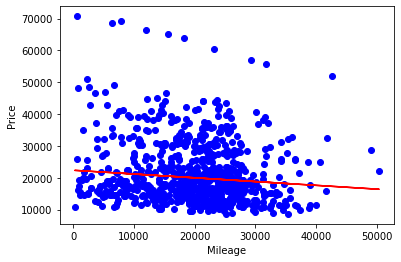

In [51]:
plt.scatter(y,x,color='blue')
plt.plot(y,model.predict(y),color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [53]:
print("r squared:",model.score(x,y))

r squared: 0.020463447323489037


In [54]:
print('The R Score of .020 is not a great one.  Need to look at other options ')

The R Score of .020 is not a great one.  Need to look at other options 


# **Task 2**

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation. 

Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

 Find the combination of the factors that is the best predictor for price.

In [66]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X2 = df[features]
y2 = df[price]

model2 = LinearRegression()
model2.fit(X2, y2)

LinearRegression()

In [68]:
print('R-squared based on Mileage, cylinder,liter etc: ', model2.score(X2,y2))

print('0.44 is also not a strong correlation')

R-squared based on Mileage, cylinder,liter etc:  0.4462643536728379
0.44 is also not a strong correlation


# **Task 3**

Research dummy variables in scikit-learn to see how to use the make, model, and body type. Find the best combination of factors to predict price.

In [73]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [74]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X3 = df_with_dummies[columns]
y3 = df_with_dummies['Price']

model3= LinearRegression()
model3.fit(X3, y3)

LinearRegression()

In [75]:
print('Intercept:', model3.intercept_)
print('Coefficient:',model3.coef_)
print('R Squared Score:', model3.score(X3,y3))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
R Squared Score: 0.9363889951039477


# **Find the best combination**

In [86]:
combinations = []
for x in range(1,8):
  combinations.append(itertools.combinations(features, x))

In [96]:
best_score=0
for item in combinations:
  for group in item:
    group = list(group)
    x=df[group]
    degrees = 8

    for degree in range(degrees):
      model5 = pipeline.Pipeline([('poly',preprocessing.PolynomialFeatures(degree=degree)),'linear',linear_model.LinearRegression(fit_intercept=False)])
      model5.fit(x,y2)
      model_score=model5.score(x,y)
    if best_score < model_score:
      best_score = model_score
      maxgroup = group
      best_degree = degree
print(degree,maxgroup,best_score)


8 ['Mileage'] 0
